In [1]:
%matplotlib inline

import os, pathlib
import logging, warnings
logging.basicConfig(level=logging.ERROR)
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

if "__file__" not in dir():
    try:
        NBPath = pathlib.Path.cwd()
        RepoPath = NBPath.parent
        os.chdir(RepoPath)

        from tools import dataTools as dt
        from tools import ccaTools as cca
        from tools import decodeTools as decode

        import params
        monkey_defs = params.monkey_defs
        mouse_defs = params.mouse_defs

        set_rc =  params.set_rc_params
        set_rc()
        root = params.root

        os.chdir(RepoPath / 'monkey')
        %run "_dataset-selection.ipynb"

    finally:
        os.chdir(NBPath)

    print('Done')

FIGPATH = params.figPath / 'fig4'
if not os.path.exists(FIGPATH):
    os.makedirs(FIGPATH)

Done


### Get data


In [2]:
full_list_MCx_monkey, allDFs_MCx_monkey = dt.get_full_monkey_data(GoodDataList_CO)
_, allDFs_str_mouse = dt.get_full_mouse_data()
raster_example_df = dt.get_example_monkey_data(epoch = monkey_defs.exec_epoch)

### Fig 4B: CCA for striatum in mice

Across vs within: WilcoxonResult(statistic=0.0, pvalue=2.9802322387695312e-08)
Across vs control: WilcoxonResult(statistic=0.0, pvalue=0.000244140625)
Executed: `plot_cca` in 14.2s


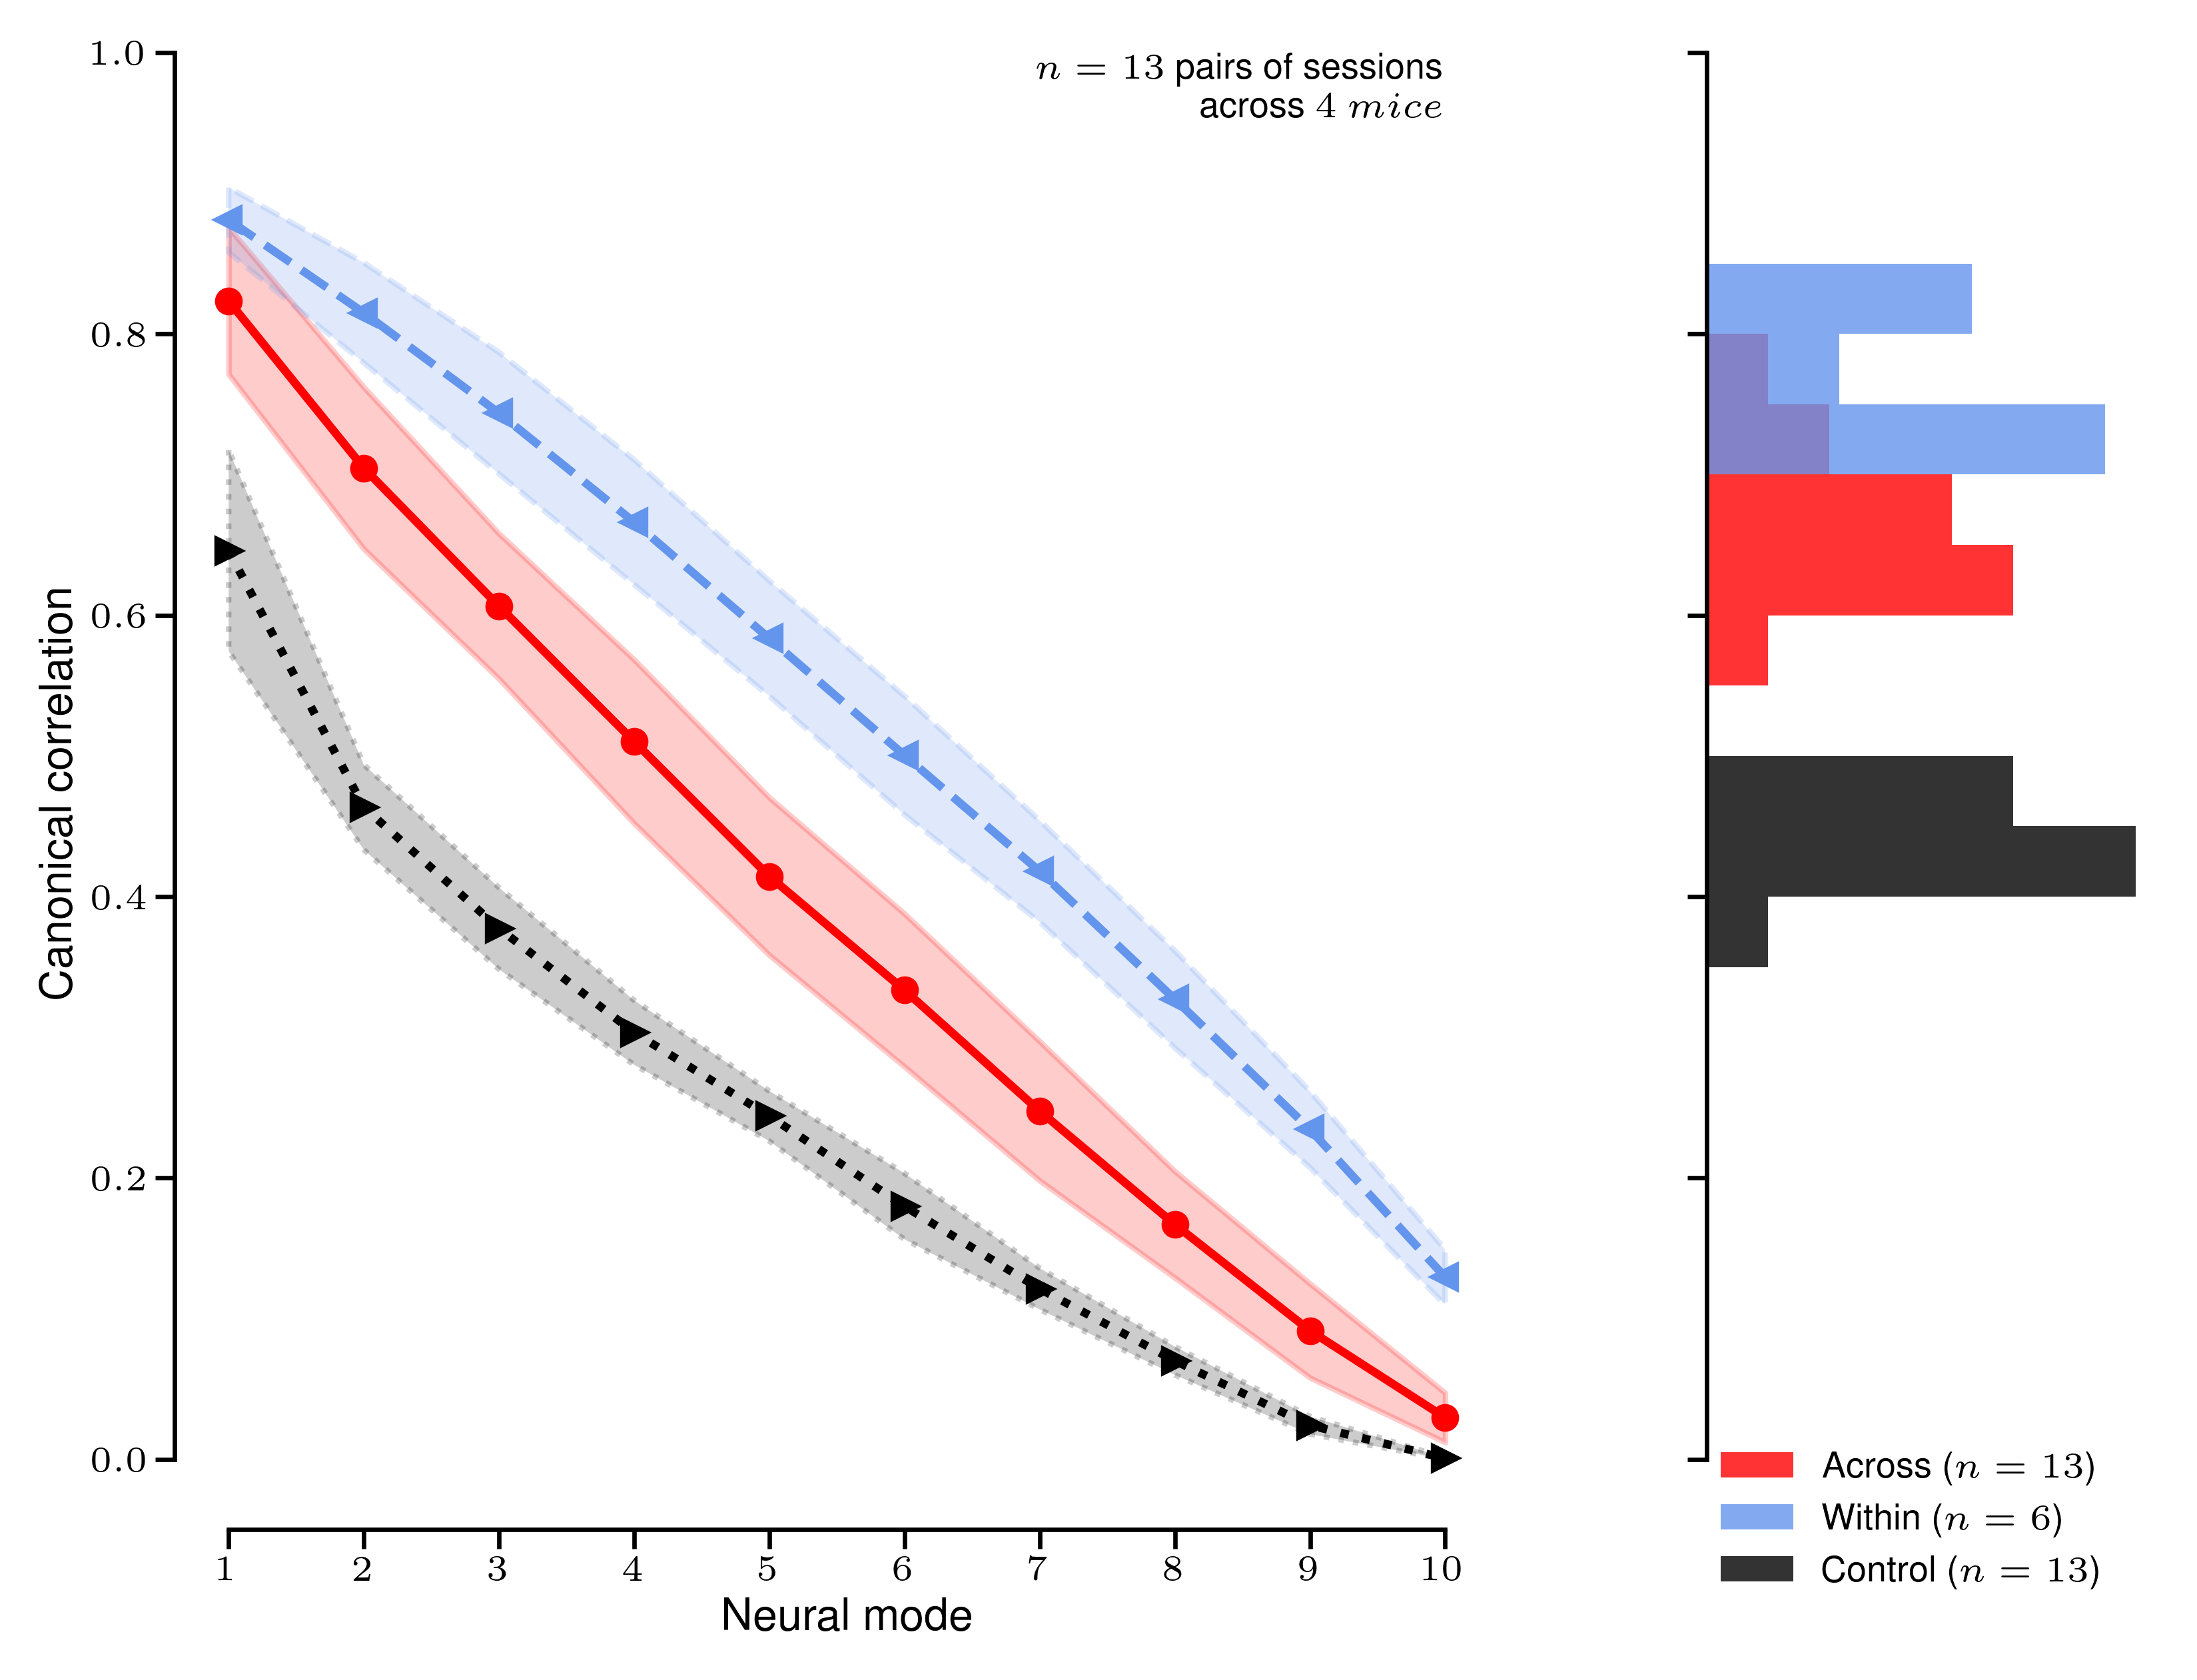

In [3]:
fig, axes = plt.subplots(ncols = 2, gridspec_kw={'width_ratios': [params.panels.cca[0],params.panels.cca_hist[0]-params.panels.cca[0]]})

cca.plot_cca(axes[0], axes[1], allDFs_str_mouse, 
            mouse_defs.exec_epoch, 
            mouse_defs.areas[1], 
            mouse_defs.n_components, 
            dataset='mouse')
fig.savefig(FIGPATH / 'mouse-cca-str.pdf', format='pdf', bbox_inches='tight')

### Fig 4C: Decoding for mice striatum

100%|█████████████████████████████████████████████| 6/6 [09:18<00:00, 93.13s/it]


Executed: `mouse_decoding` in 558.8s
Across vs within: WilcoxonResult(statistic=0.0, pvalue=2.9802322387695312e-08)
Across vs control: WilcoxonResult(statistic=2.0, pvalue=0.000732421875)


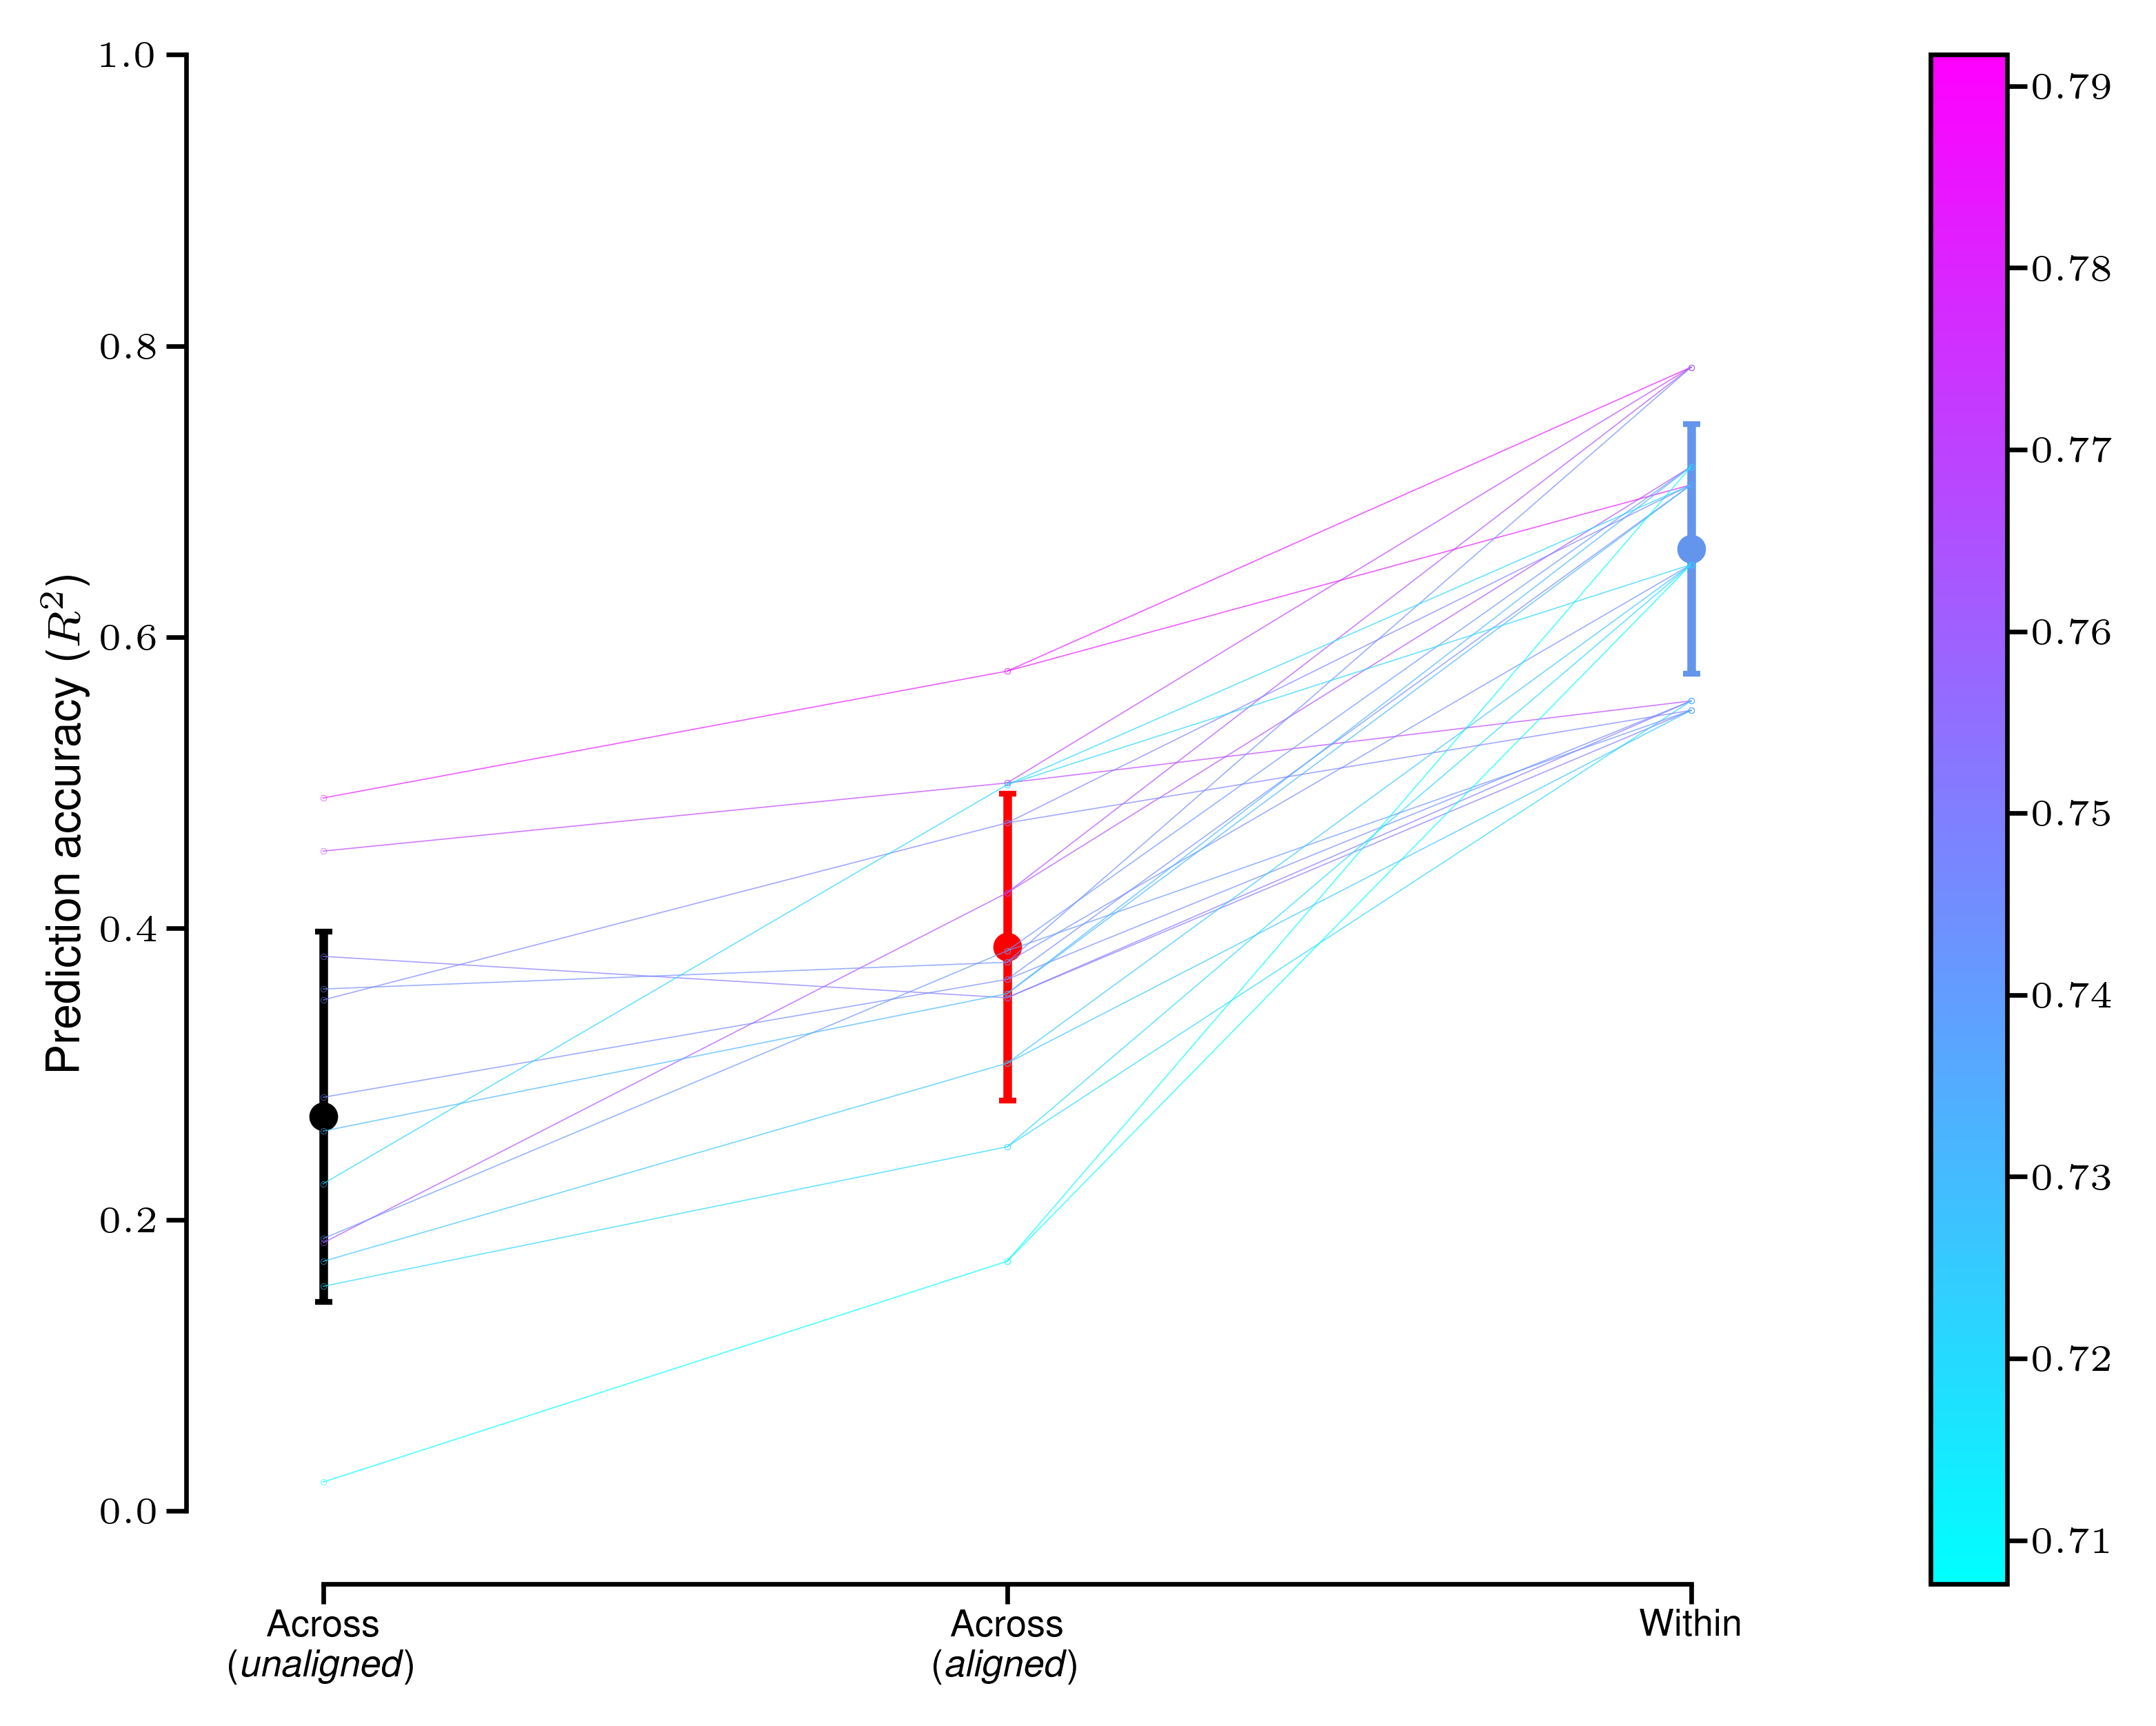

In [4]:
fig, ax = plt.subplots()
decode.plot_decoding(ax, allDFs_str_mouse, 
                 epoch = mouse_defs.exec_epoch_decode, 
                 area = mouse_defs.areas[1], 
                 dataset = 'mouse', 
                 color_by_behav_corr = True)

fig.savefig(FIGPATH / 'mouse-decoding-str.pdf', format='pdf', bbox_inches='tight')


### Fig 4E: CCA for preparation in monkeys

Across vs within: WilcoxonResult(statistic=0.0, pvalue=4.354299365440666e-43)
Across vs control: WilcoxonResult(statistic=0.0, pvalue=2.029467500049271e-22)
Executed: `plot_cca` in 181.3s


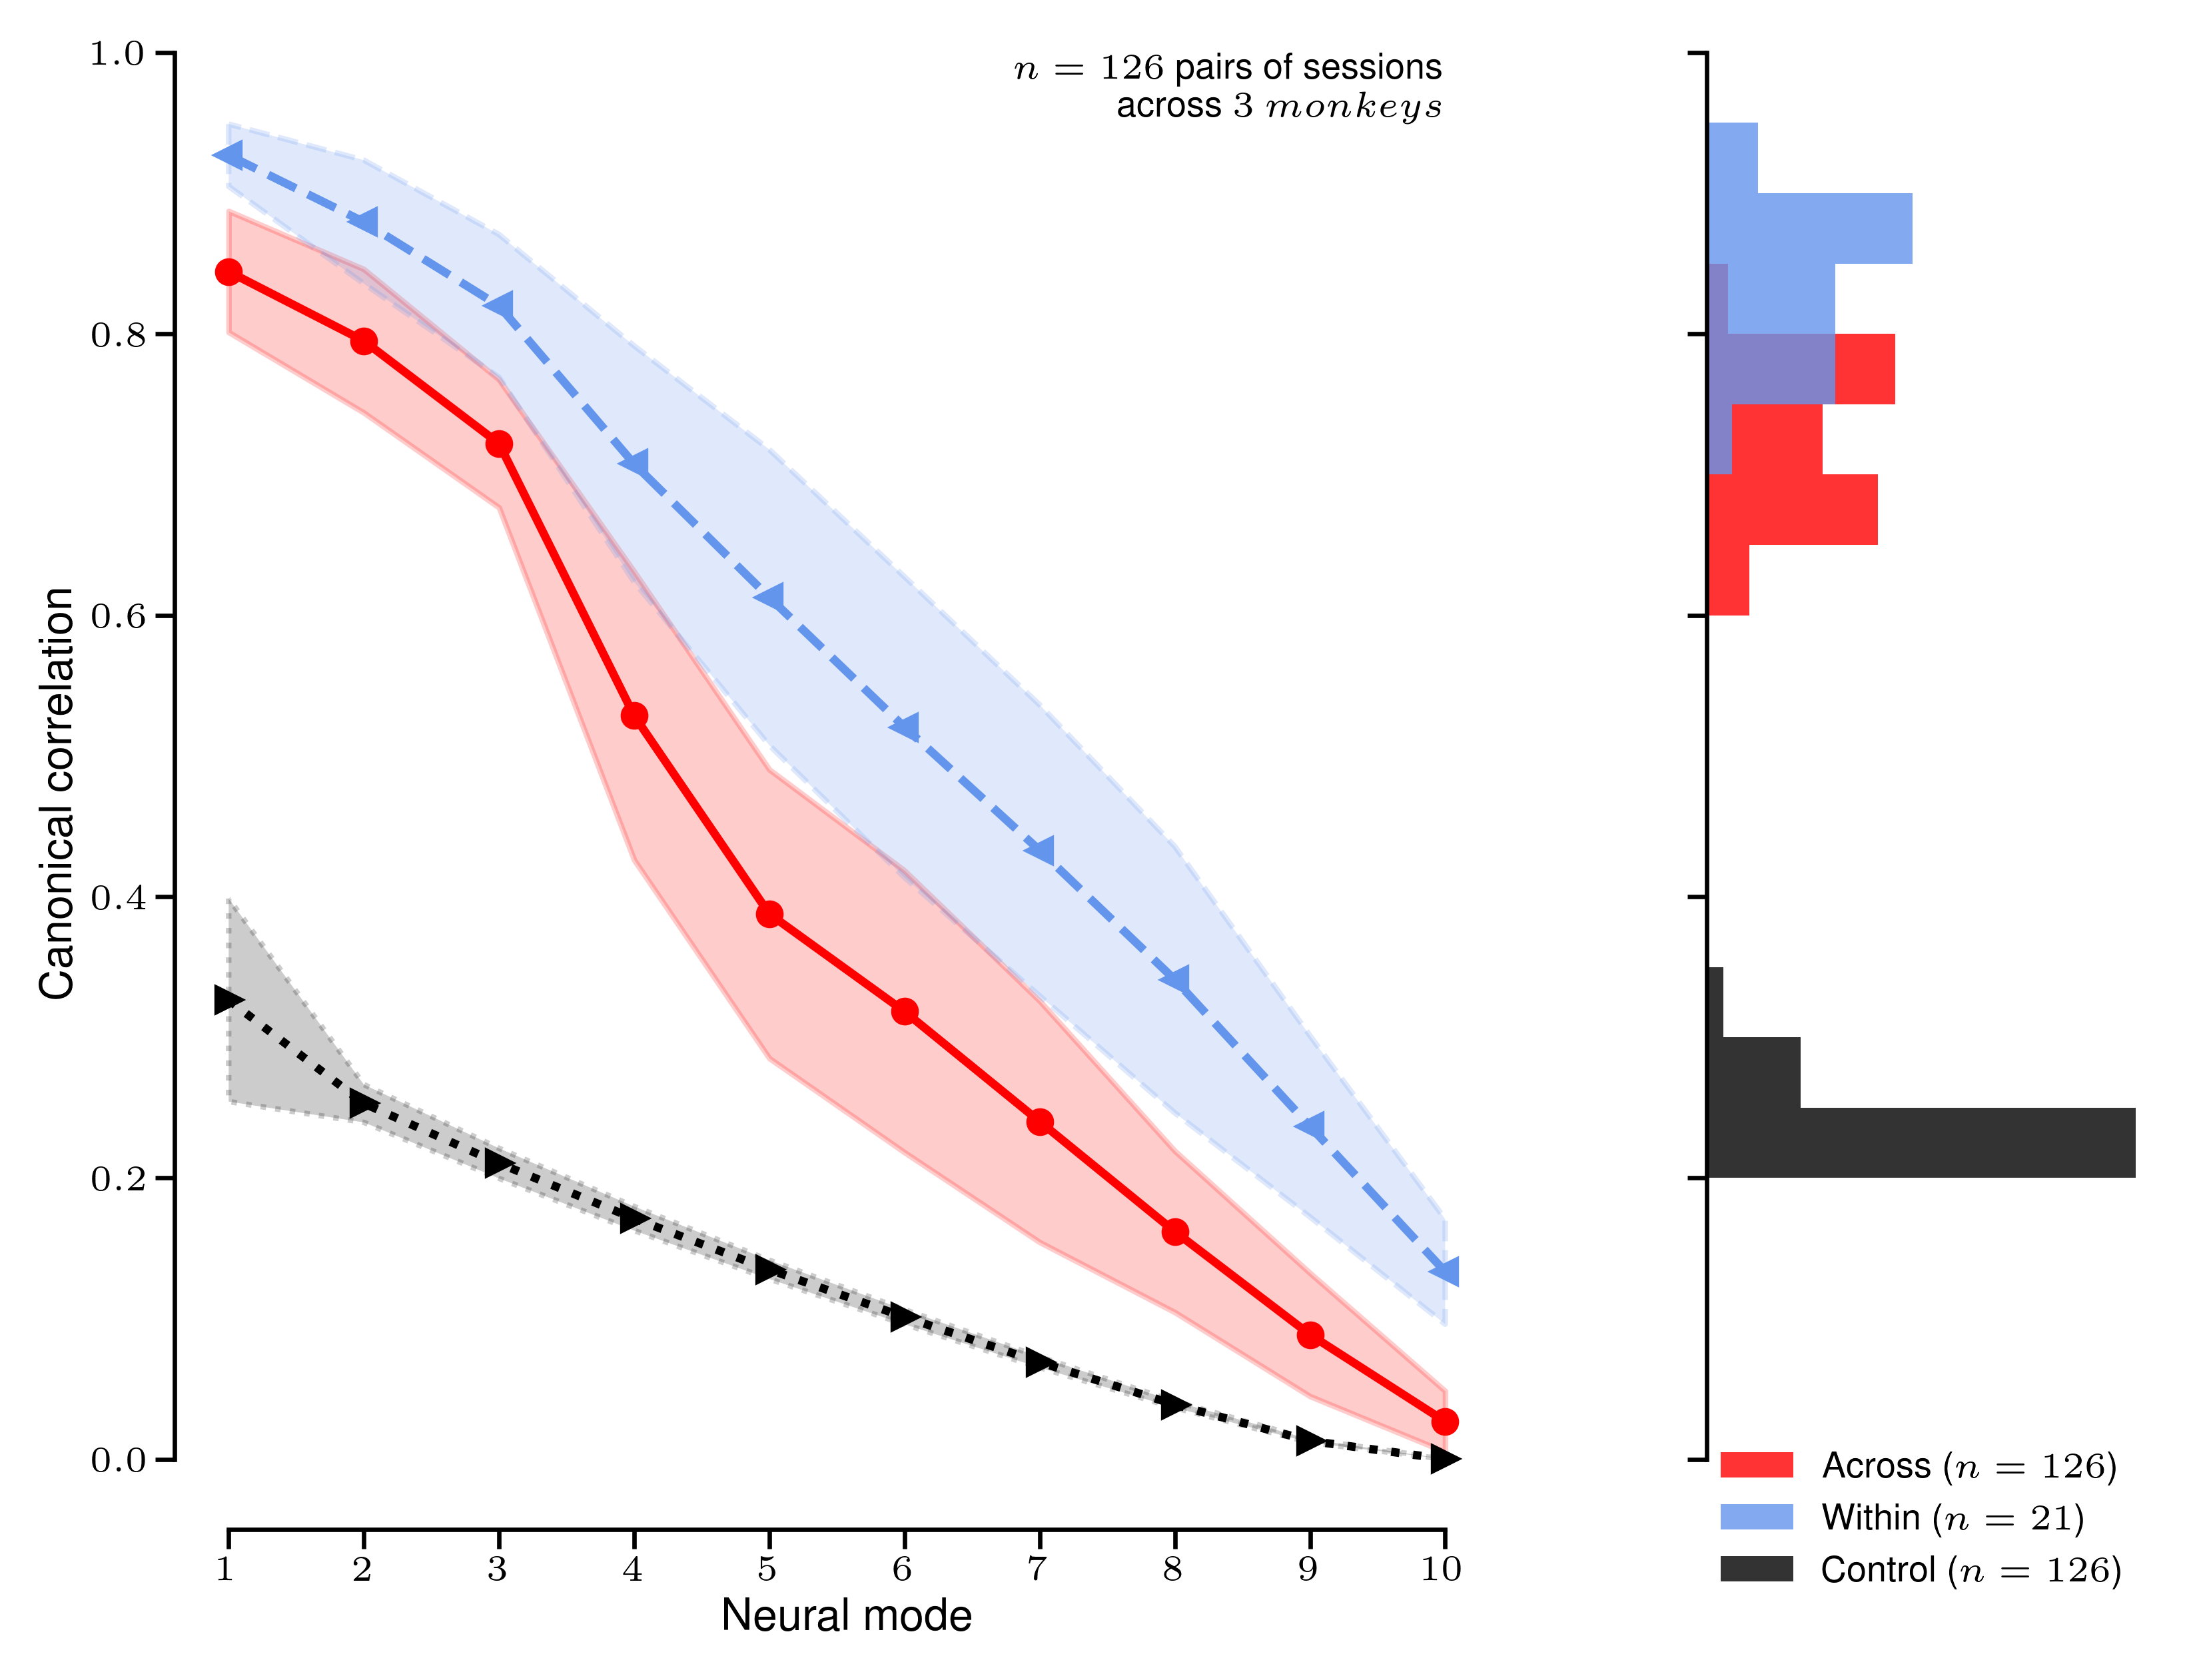

In [5]:
fig, axes = plt.subplots(ncols = 2, gridspec_kw={'width_ratios': [params.panels.cca[0],params.panels.cca_hist[0]-params.panels.cca[0]]})

cca.plot_cca(axes[0], axes[1], allDFs_MCx_monkey, 
            monkey_defs.prep_epoch, 
            monkey_defs.areas[2], 
            monkey_defs.n_components, 
            dataset='monkey')
fig.savefig(FIGPATH / 'monkey-cca-prep.pdf', format='pdf', bbox_inches='tight')


### 4F: Decoding for monkeys 

100%|███████████████████████████████████████████| 21/21 [00:54<00:00,  2.61s/it]


Executed: `monkey_target_decoding` in 54.7s
Across vs within: WilcoxonResult(statistic=3272.0, pvalue=0.0001565131631320171)
Across vs control: WilcoxonResult(statistic=0.0, pvalue=1.6583905059103318e-13)


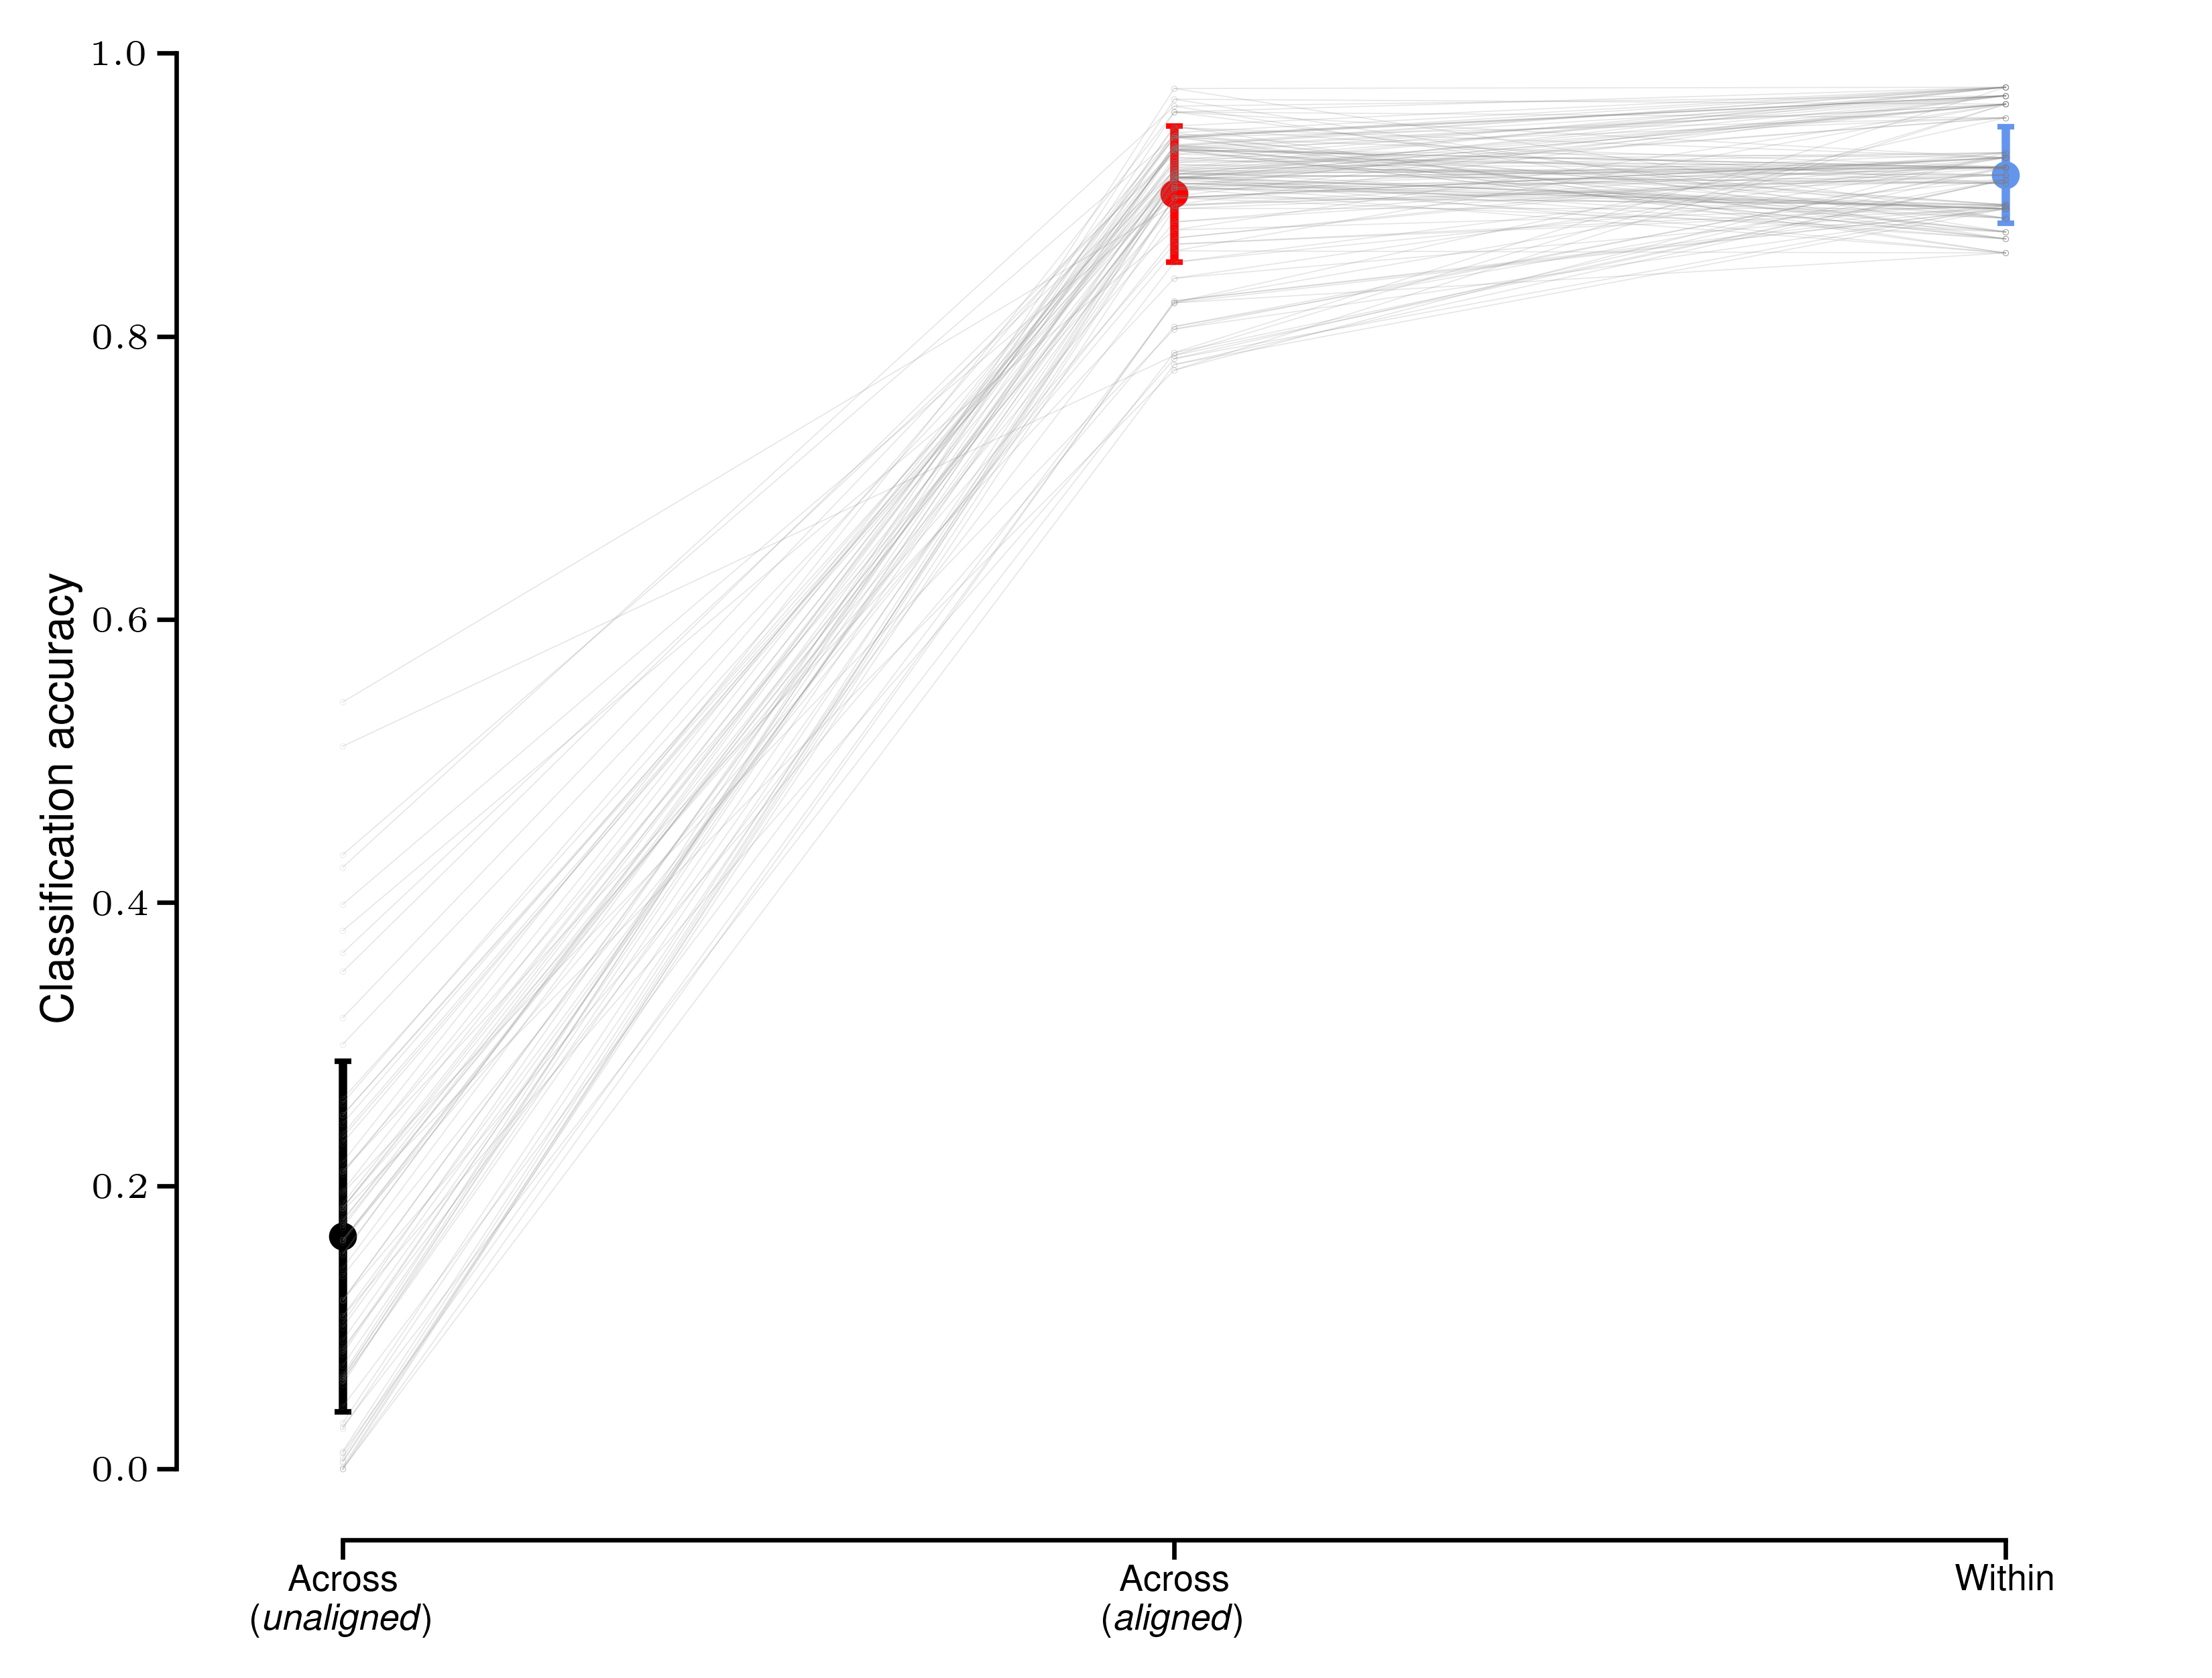

In [6]:
fig, ax = plt.subplots()
decode.plot_decoding(ax, allDFs_MCx_monkey, 
                    epoch = monkey_defs.prep_epoch, 
                    area = monkey_defs.areas[2], 
                    target = True)

fig.savefig(FIGPATH / 'monkey-target-decoding.pdf', format='pdf', bbox_inches='tight')
